**Linear Regression**
* Y = wX + b
  - Y: dependent variable
  - X: independent variable
  - w: weight
  - b: bias

**Gradient Descent**: optimization algorithm used for minimizing the loss function. Used for updating the parameters of the learning model
- w = w - a*dw
- b = b - a*db

**Learning rate**: tuning parameter in an optimization algorithm, determines the step size at each iteration while moving toward a minimum of a loss function

In [ ]:
# import library
import numpy as np


# Linear Regression

In [ ]:
class Linear_Regression():

  # Initiating the parameters: learning rate, no_of_iteration
  def __init__(self, learning_rate, no_of_iteration):
    self.learning_rate = learning_rate
    self.no_of_iteration = no_of_iteration

  #
  def fit(self, X, y):
    # number of training expamles & number of features
    self.m, self.n = X.shape
    # initiating the weights and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.y = y
    #implementing Gradient descent
    for i in range(self.no_of_iteration):
      self.update_weights()

  def update_weights(self,):
    y_prediction = self.predict(self.X)
    # calculate the gradients
    dw = -(2*(self.X.T).dot(self.y-y_prediction)) / self.m
    db = -(2*np.sum(self.y-y_prediction)) / self.m

    # updating the weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, X):
    return X.dot(self.w) + self.b

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-Processing

In [ ]:
# loading the data from csv file to a pandas dataframe
salary_data = pd.read_csv("/content/salary_data.csv")

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
#Checking for missing value
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

##Slitting the feature & target

In [ ]:
X = salary_data.iloc[:,:1].values
y = salary_data.iloc[:,1].values

In [ ]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

## Training the model

In [ ]:
model = Linear_Regression(learning_rate=0.02, no_of_iteration=100)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
#print parameter
print("weight: ", model.w[0])
print("bias: ", model.b)

weight:  10941.258155090314
bias:  13499.045037502532


In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 27722.68063912  25534.4290081   62734.70673541  53981.70021134
  91181.97793864  79146.59396804 103217.36190924  46322.81950277
  35381.56134768  87899.60049212]


## Visualizing the predicted & actual values

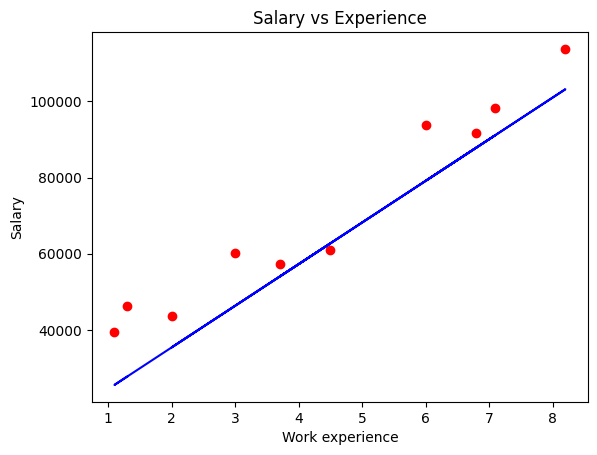

In [ ]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, test_data_prediction, color="blue")
plt.xlabel("Work experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()

# Logistic regression:

* Step 1: Set learning rate & number of iterations; Initiate random weights and bias value
* Step 2: Build logistic regression function
* Step 3: update parameter using gradient descent
* Step 4: build the predict function to determine the class of the data point.

In [ ]:
# Import library
import numpy as np

In [ ]:
class Logistic_Regression():
  def __init__(self, learning_rate, no_of_iteration):
    self.learning_rate = learning_rate
    self.no_of_iteration = no_of_iteration

  def fit(self, X, y):
    self.m, self.n = X.shape      # m rows: number of data points, n columns: number of inputs

    # Initiating weights and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.y = y

    #implimenting Gradient Descent for Optimization
    for i in range(self.no_of_iteration):
      self.update_weights()

  def update_weights(self):
    #y_hat formula:
    y_hat = 1/(1+np.exp(-(self.X.dot(self.w) + self.b))) # wX + b

    # Derivatives
    dw = (1/self.m)*(np.dot(self.X.T, y_hat-self.y))
    db = (1/self.m)*(np.sum(y_hat-self.y))

    # Updating weights and bias
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  # sigmoid equation and decision boundary
  def predict(self, X):
    y_pred = 1/(1+np.exp(-(X.dot(self.w) + self.b)))
    y_pred = np.where(y_pred > 0.5, 1, 0)
    return y_pred

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
diabetes_data = pd.read_csv("/content/diabetes.csv")

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
# Getting the statistical measures of the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Count values of Outcome columns
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# mean value of grouped outcome
diabetes_data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# Separating features and targets
features = diabetes_data.drop(columns="Outcome", axis=1)
targets = diabetes_data["Outcome"]

In [ ]:
features, targets

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

## Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(features)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(features)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
features = standardized_data

## Train, test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=2)

In [ ]:
features.shape, X_train.shape, X_test.shape

((768, 8), (614, 8), (154, 8))

## Train the model

In [ ]:
classifier = Logistic_Regression(learning_rate=0.01, no_of_iteration=1000)

In [ ]:
classifier.fit(X_train, y_train)

## Model evaluation

### Accuracy score

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [ ]:
print("Accuracy on train data: ", training_data_accuracy)

Accuracy on train data:  0.7768729641693811


In [ ]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [ ]:
print("Accuracy on test data: ", testing_data_accuracy)

Accuracy on test data:  0.7662337662337663


## Make a predictive system

# SVM Classifier

In [ ]:
# Import library
import numpy as np

In [ ]:
class SVM_Classifier():
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  def fit(self, X, y):
    self.X = X
    self.y = y
    #m =  rows = number of data points
    #n = columns = number of features
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_label = np.where(self.y <=0, -1, 1)
    for index, x_i in enumerate(self.X):
      condition = y_label[index] * (np.dot(x_i, self.w) + self.b) >= 1
      if (condition == True):
        dw = 2*self.lambda_parameter*self.w
        db = 0
      else:
        dw = 2*self.lambda_parameter*self.w - np.dot(x_i, y_label[index])
        db = y_label[index]
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db


  def predict(self,X):
    output = np.dot(X, self.w) - self.b
    predicted_label = np.sign(output)
    y_hat = np.where(predicted_label <=-1, 0, 1)
    return y_hat

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Data collecting & preprocessing

In [ ]:
diabetes_data = pd.read_csv("/content/diabetes.csv")

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
# getting the statistical measure
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# features, targets split
features = diabetes_data.drop(columns="Outcome", axis=1)
targets = diabetes_data["Outcome"]


## Data standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(features)
standardized_data = scaler.transform(features)

In [ ]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
features = standardized_data

## Train Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=2)

In [ ]:
features.shape, X_train.shape, X_test.shape

((768, 8), (614, 8), (154, 8))

## Apply SVM Classifier

In [ ]:
classifier = SVM_Classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

In [ ]:
#training with training data
classifier.fit(X_train, y_train)

## Model evaluation

In [ ]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [ ]:
print("Accuracy score on training data: ", training_data_accuracy)

Accuracy score on training data:  0.6368078175895765


In [ ]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [ ]:
print("Accuracy score on testing data: ", testing_data_accuracy)

Accuracy score on testing data:  0.7077922077922078


# Lasso Regression


In [ ]:
import numpy as np

In [ ]:
class Lasso_Regression():
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  def fit(self, X, y):
    # m = rows = number of data points
    # n = columns = number of input features
    self.m, self.n = X.shape
    self.X = X
    self.y = y
    self.w = np.zeros(self.n)
    self.b = 0
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_predict = self.predict(self.X)
    for i in range(self.n):
      if self.w[i] > 0:
        dw[i] = -2*(self.X[:,i].dot((self.y-y_predict)) + self.lambda_paremeter)/self.m
      else:
        dw[i] = -2*(self.X[:,i].dot((self.y-y_predict)) - self.lambda_paremeter)/self.m
      db = -2(sum(self.y-y_predict))/self.m
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

  def predict(self, X):
    y_hat = X.dot(self.w) + self.b
    return y_hat


#K-Nearest Neigbors

## Eucledian distance

In [1]:
import numpy as np

In [2]:
def get_euclidean_distance(p1,p2):
  dist = 0
  for i in range(len(p1)):
    dist = dist + (p1[i]-p2[i])**2
  return np.sqrt(dist)

In [3]:
get_euclidean_distance((1,1,1),(2,2,2))

1.7320508075688772

## Manhattan distance

In [4]:
def get_manhattan_distance(p1,p2):
  dist = 0
  for i in range(len(p1)):
    dist = dist + abs(p1[i]-p2[i])
  return dist

In [5]:
get_manhattan_distance((1,1),(2,2))

2

## Comparing manhattan and euclidean

In [6]:
a = get_euclidean_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(37,1,2,130,250,0,1,187,0,3.5,0,0,2))
b = get_manhattan_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(37,1,2,130,250,0,1,187,0,3.5,0,0,2))

In [7]:
a, b

(50.640300157088326, 100.2)

In [8]:
a = get_euclidean_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(67,1,0,160,286,0,0,108,1,1.5,1,3,2))
b = get_manhattan_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(67,1,0,160,286,0,0,108,1,1.5,1,3,2))

In [9]:
a, b

(69.54595602908914, 124.8)

## KNN classifier



In [10]:
import statistics
class KNN_Classifier():
  def __init__(self, distance_metric):
    self.distance_metric = distance_metric

  def get_distance_metric(self, training_data_point, test_data_point):
    if (self.distance_metric == "euclidean"):
      dist = 0
      for i in range (len(training_data_point)-1):
        dist = dist + (training_data_point[i] - test_data_point[i])**2
      euclidean_dist = np.sqrt(dist)
      return euclidean_dist
    elif(self.distance_metric == "manhattan"):
      dist = 0
      for i in range(len(training_data_point)-1):
        dist = dist + abs(training_data_point[i] - test_data_point[i])
      return dist

  def nearest_neighbors(self, X_train, test_data, k):
    distance_list = []
    for training_data in X_train:
      distance = self.get_distance_metric(training_data, test_data)
      distance_list.append((training_data, distance))
    distance_list.sort(key = lambda x : x[1]) # sort the list based on distance
    neighbors_list = []
    for j in range(k):
      neighbors_list.append(distance_list[j][0])
    return neighbors_list

  def predict(self, X_train, test_data, k):
    neighbors = self.nearest_neighbors(X_train, test_data, k)
    for data in neighbors:
      label = []
      label.append(data[-1])
    predicted_class = statistics.mode(label)
    return predicted_class

## Diabetes Prediction

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
diabetes_dataset = pd.read_csv("/content/diabetes.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/diabetes.csv'

In [ ]:
diabetes_dataset.head()

In [ ]:
diabetes_dataset.shape

In [ ]:
features = diabetes_dataset.drop(columns = "Outcome", axis = 1)
targets = diabetes_dataset["Outcome"]

In [ ]:
X = features.to_numpy()
y = targets.to_numpy()

In [ ]:
X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_train = np.insert(X_train, 8, y_train, axis=1)

- X_train: data with targets
- X_test: data without targets

In [ ]:
classifier = KNN_Classifier(distance_metric="euclidean")

In [ ]:
prediction = classifier.predict(X_train, X_test[0], k=5)

In [ ]:
prediction, y_test[0]

In [ ]:
X_test.shape

In [ ]:
X_test_size = X_test.shape[0]

In [ ]:
y_pred = []
for i in range(X_test_size):
  prediction = classifier.predict(X_train, X_test[i], k=5)
  y_pred.append(prediction)

### Model evaluation

In [ ]:
accuracy = accuracy_score(y_pred, y_test)

In [ ]:
accuracy

# Cross - Validation

In [ ]:
# import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Data collection and processing

In [ ]:
heart_data = pd.read_csv("/content/heart.csv")

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
#Count missing value
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## Splitting features and target

In [ ]:
X = heart_data.drop(columns="target", axis=1)
y = heart_data["target"]

In [ ]:
X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

## Comparing the performance of models

In [ ]:
models = [LogisticRegression(max_iter=1000), SVC(kernel="linear"), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models_train_test():
  for model in models:
    model.fit(X_train, y_train)
    test_data_prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, test_data_prediction)
    print("Accuracy score of ", model, " = ",accuracy)

In [ ]:
compare_models_train_test()

Accuracy score of  LogisticRegression(max_iter=1000)  =  0.8032786885245902
Accuracy score of  SVC(kernel='linear')  =  0.819672131147541
Accuracy score of  KNeighborsClassifier()  =  0.6229508196721312
Accuracy score of  RandomForestClassifier()  =  0.7540983606557377


## Cross validation

### Logistic Regression

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)

In [ ]:
mean_accuracy = sum(cv_score_lr)/len(cv_score_lr)*100

In [ ]:
mean_accuracy = round(mean_accuracy,2)
mean_accuracy

82.83

## Support Vector Classifier

In [ ]:
cv_score_svc = cross_val_score(SVC(kernel="linear"), X, y, cv=5)
mean_accuracy = round(sum(cv_score_svc)/len(cv_score_svc)*100,2)

In [ ]:
mean_accuracy

82.83

## Creating a function to compare models

In [ ]:
def compare_models_cross_validation():
  for model in models:
    cv_score = cross_val_score(model, X, y, cv=5)
    mean_accuracy = round(sum(cv_score)/len(cv_score)*100,2)
    print("Cross Validation accuracy of ", model, " = ", mean_accuracy)

In [ ]:
compare_models_cross_validation()

Cross Validation accuracy of  LogisticRegression(max_iter=1000)  =  82.83
Cross Validation accuracy of  SVC(kernel='linear')  =  82.83
Cross Validation accuracy of  KNeighborsClassifier()  =  64.39
Cross Validation accuracy of  RandomForestClassifier()  =  82.82


# **Hyperparameter Tuning**
1. GridSearchCV
2. RandomizedSearchCV

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_frame["label"] = breast_cancer_dataset.target

In [ ]:
data_frame.shape

(569, 31)

In [ ]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
data_frame["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

In [ ]:
X = data_frame.drop(columns = "label", axis=1)
y = data_frame["label"]

In [ ]:
X, y

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [ ]:
X = np.asarray(X)
y = np.asarray(y)

## **GridSearchCV**
GridSearchCV is used to determining the best parameters for our model

In [ ]:
# loading the SVC
model = SVC()

In [ ]:
# Hyperparameters
parameters = {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "C" : [1, 5, 10, 20]
}

In [ ]:
#grid search
classifier = GridSearchCV(model, parameters, cv=5)

In [ ]:
#Fitting the data in model
classifier.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([1.91191764e+00, 4.00972366e-03, 4.86745834e-03, 1.72543526e-02,
        3.18055420e+00, 4.30622101e-03, 4.48565483e-03, 1.50982857e-02,
        4.86205659e+00, 4.53572273e-03, 4.49390411e-03, 1.51221275e-02,
        9.99010148e+00, 4.53696251e-03, 4.24747467e-03, 1.43837452e-02]),
 'std_fit_time': array([9.69205844e-01, 1.29926270e-04, 3.39877492e-04, 2.37762104e-03,
        7.22235285e-01, 5.40493007e-04, 2.77544927e-04, 6.90916037e-04,
        1.06975509e+00, 2.76283392e-04, 5.30786167e-04, 7.79931398e-04,
        5.79336784e+00, 1.80744595e-04, 2.64318686e-04, 7.24068729e-04]),
 'mean_score_time': array([0.00154114, 0.00122614, 0.00191631, 0.00453167, 0.00127335,
        0.00134325, 0.00173521, 0.00382571, 0.00126705, 0.00119138,
        0.00165019, 0.00384889, 0.00127439, 0.0011889 , 0.00153747,
        0.00367661]),
 'std_score_time': array([5.99805025e-04, 2.57153642e-05, 2.43600260e-04, 8.30859794e-04,
        2.68161805e-04, 9.25223838e-05, 6.97397778e-

In [ ]:
best_parameter = classifier.best_params_
print(best_parameter)

{'C': 10, 'kernel': 'linear'}


In [ ]:
# highest accuracy
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [ ]:
# loading the results to pandas data frame
result = pd.DataFrame(classifier.cv_results_)

In [ ]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.911918,0.969206,0.001541,0.000600,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.004010,0.000130,0.001226,0.000026,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.004867,0.000340,0.001916,0.000244,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.017254,0.002378,0.004532,0.000831,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,3.180554,0.722235,0.001273,0.000268,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [ ]:
grid_search_result = result[["param_C", "param_kernel", "mean_test_score"]]

In [ ]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


 - Highest accuracy = 95.2%
 - Best parameters = { "c":10, "kernel": "linear"}

## **RandomizedSearchCV**

In [ ]:
model = SVC()
parameters = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [1, 5, 10, 20]
}

In [ ]:
# randomized Search
classifier = RandomizedSearchCV(model, parameters, cv=5)

In [ ]:
classifier.fit(X, y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([8.17379951e-03, 7.69715309e-03, 7.22315536e+00, 2.41187510e+00,
        4.81400490e-03, 1.52458191e-02, 5.54404621e+00, 1.50554180e-02,
        4.77628708e-03, 1.25069466e+01]),
 'std_fit_time': array([1.71627187e-03, 5.50137104e-04, 1.84961865e+00, 1.60887629e+00,
        1.17869535e-04, 1.22543653e-03, 2.14228016e+00, 6.09302644e-04,
        1.68557814e-04, 5.86968983e+00]),
 'mean_score_time': array([0.00319982, 0.0024437 , 0.00124836, 0.00135417, 0.00184665,
        0.00379238, 0.00149245, 0.00393257, 0.00118608, 0.00135818]),
 'std_score_time': array([6.87761443e-04, 6.40006396e-04, 2.35037190e-04, 3.06428425e-04,
        7.82246380e-05, 1.27100191e-04, 3.30394662e-04, 1.04309543e-04,
        6.00889368e-05, 2.94651281e-04]),
 'param_kernel': masked_array(data=['rbf', 'poly', 'linear', 'linear', 'rbf', 'sigmoid',
                    'linear', 'sigmoid', 'poly', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
         

In [ ]:
# best parameter
best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 10}


In [ ]:
#highest accuracy
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [ ]:
result = pd.DataFrame(classifier.cv_results_)

In [ ]:
randomized_search_result = result[["param_C", "param_kernel", "mean_test_score"]]

In [ ]:
randomized_search_result

,param_C,param_kernel,mean_test_score
0,10,rbf,0.922714
1,10,poly,0.920975
2,10,linear,0.952569
3,1,linear,0.945536
4,1,rbf,0.912172
5,10,sigmoid,0.402391
6,5,linear,0.950815
7,5,sigmoid,0.411178
8,20,poly,0.919221
9,20,linear,0.949061
